# Import Necessary Libraries

In [23]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
gas_turbine_data = pd.read_csv('gas_turbines.csv')
gas_turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# Data Understanding

In [3]:
gas_turbine_data.shape

(15039, 11)

In [4]:
gas_turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
gas_turbine_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [6]:
gas_turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

## As per problem statement we need input variable which are ambient and outputTurbine Energy yield
#### Input 
* Ambient Temp (AT)
* Ambient pressure (AP)
* Ambient humidity (AH)

#### Output
* Turbine energy yeild

# Data Preprocessing

In [7]:
X = gas_turbine_data[['AT','AP','AH']]
y = gas_turbine_data[['TEY']]

In [8]:
X

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [9]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


# Model Building

### Build The Architecture

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=0.20)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 3), (3008, 3), (12031, 1), (3008, 1))

Since it is a regression problem the activation function here we use is linear activation function that is we dont have to pass any activation function while forming the architecture.

In [13]:
model = Sequential()
model.add(Dense(units=200))
model.add(Dense(units=100))
model.add(Dense(units=1))

### Model Compiling

In [14]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics='mean_squared_error')

# Model Training 

In [15]:
model_training = model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,validation_data=(X_test,y_test))
model_training

Epoch 1/10
376/376 [==============================] - 2s 3ms/step - loss: 1515.8336 - mean_squared_error: 1515.8336 - val_loss: 303.8559 - val_mean_squared_error: 303.8559
Epoch 2/10
376/376 [==============================] - 1s 2ms/step - loss: 284.8597 - mean_squared_error: 284.8597 - val_loss: 272.3181 - val_mean_squared_error: 272.3181
Epoch 3/10
376/376 [==============================] - 1s 2ms/step - loss: 285.5310 - mean_squared_error: 285.5310 - val_loss: 225.2190 - val_mean_squared_error: 225.2190
Epoch 4/10
376/376 [==============================] - 1s 3ms/step - loss: 280.8521 - mean_squared_error: 280.8521 - val_loss: 283.0030 - val_mean_squared_error: 283.0030
Epoch 5/10
376/376 [==============================] - 1s 2ms/step - loss: 302.7674 - mean_squared_error: 302.7674 - val_loss: 253.9498 - val_mean_squared_error: 253.9498
Epoch 6/10
376/376 [==============================] - 1s 2ms/step - loss: 301.5623 - mean_squared_error: 301.5623 - val_loss: 225.1459 - val_mean_sq

# Model Prediction

In [16]:
y_pred = model.predict(X_test).flatten()
y_pred

94/94 [==============================] - 0s 2ms/step


array([124.69781, 131.46371, 129.30162, ..., 130.12395, 131.74193,
       134.20259], dtype=float32)

# Model Evaluation

In [18]:
model_results = model.evaluate(x=X_test,y=y_test)
print('Model Loss          :',round(model_results[0],4))
print('Mean Squared Error  :',round(model_results[1],4))


94/94 [==============================] - 0s 2ms/step - loss: 242.5384 - mean_squared_error: 242.5384
Model Loss          : 242.5384
Mean Squared Error  : 242.5384


In [19]:
model_comparision = pd.DataFrame({'Actual Output':y_test.values.flatten(),'Predicted Output':y_pred})
model_comparision.head(20)

,Actual Output,Predicted Output
0,108.81,124.697807
1,159.21,131.463715
2,110.79,129.301620
3,109.12,124.895790
4,110.17,124.441284
5,134.70,140.969955
6,133.79,128.790741
7,133.16,128.288681
8,110.83,129.530609
9,148.35,131.681686


# Model Performance

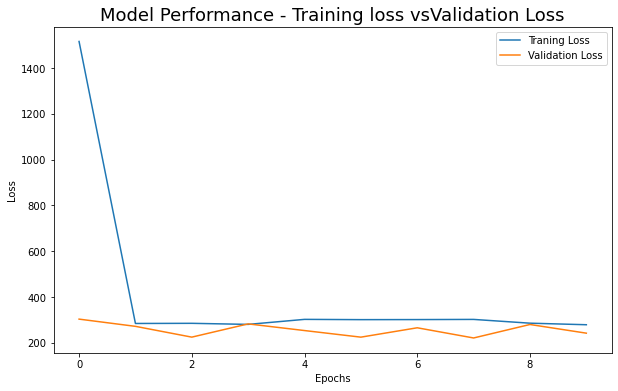

In [21]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],label='Traning Loss')
plt.plot(model_training.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training loss vsValidation Loss',size=18)
plt.legend()
plt.show()

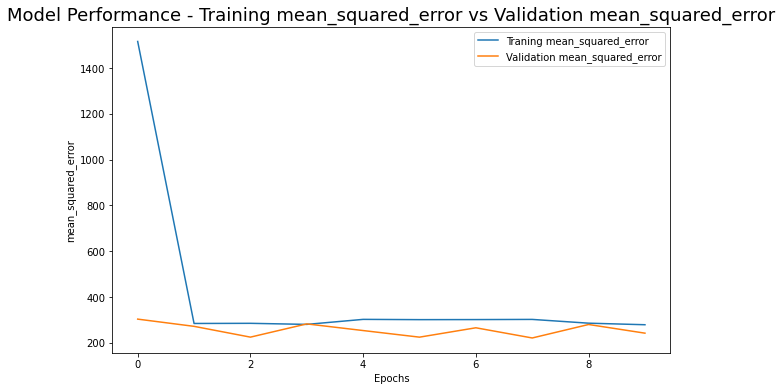

In [22]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['mean_squared_error'],label='Traning mean_squared_error')
plt.plot(model_training.history['val_mean_squared_error'],label='Validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.title('Model Performance - Training mean_squared_error vs Validation mean_squared_error',size=18)
plt.legend()
plt.show()

# LET'S OPTIMIZE OUR MODEL PERFORMANCE

### 1. Using Scaled Input

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4397781 , -0.82664395,  1.28143632],
       [-1.44960109, -0.74864748,  1.30456402],
       [-1.43472138, -0.68625031,  1.21908576],
       ...,
       [-1.38626659, -1.07623263,  1.47697056],
       [-1.42042259, -0.99823616,  1.44159024],
       [-1.43073409, -0.93583899,  1.33465179]])

# Model Building

### Build The Architecture

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=15,test_size=0.20)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 3), (3008, 3), (12031, 1), (3008, 1))

Since it is a regression problem the activation function here we use is linear activation function that is we dont have to pass any activation function while forming the architecture.

In [27]:
model = Sequential()
model.add(Dense(units=200))
model.add(Dense(units=100))
model.add(Dense(units=1))

### Model Compiling

In [28]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics='mean_squared_error')

# Model Training 

In [29]:
model_training = model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,validation_data=(X_test,y_test))
model_training

Epoch 1/10
376/376 [==============================] - 2s 3ms/step - loss: 4103.1289 - mean_squared_error: 4103.1289 - val_loss: 223.3629 - val_mean_squared_error: 223.3629
Epoch 2/10
376/376 [==============================] - 1s 3ms/step - loss: 225.1228 - mean_squared_error: 225.1228 - val_loss: 223.5067 - val_mean_squared_error: 223.5067
Epoch 3/10
376/376 [==============================] - 1s 3ms/step - loss: 226.1539 - mean_squared_error: 226.1539 - val_loss: 224.8096 - val_mean_squared_error: 224.8096
Epoch 4/10
376/376 [==============================] - 1s 3ms/step - loss: 226.1784 - mean_squared_error: 226.1784 - val_loss: 222.2188 - val_mean_squared_error: 222.2188
Epoch 5/10
376/376 [==============================] - 1s 3ms/step - loss: 227.3211 - mean_squared_error: 227.3211 - val_loss: 235.2581 - val_mean_squared_error: 235.2581
Epoch 6/10
376/376 [==============================] - 1s 3ms/step - loss: 226.5746 - mean_squared_error: 226.5746 - val_loss: 229.2625 - val_mean_sq

# Model Prediction

In [30]:
y_pred = model.predict(X_test).flatten()
y_pred

94/94 [==============================] - 0s 1ms/step


array([127.43592, 137.1432 , 131.4441 , ..., 133.8993 , 137.66699,
       136.1092 ], dtype=float32)

# Model Evaluation

In [31]:
model_results = model.evaluate(x=X_test,y=y_test)
print('Model Loss          :',round(model_results[0],4))
print('Mean Squared Error  :',round(model_results[1],4))


94/94 [==============================] - 0s 2ms/step - loss: 225.7155 - mean_squared_error: 225.7155
Model Loss          : 225.7155
Mean Squared Error  : 225.7155


In [32]:
model_comparision = pd.DataFrame({'Actual Output':y_test.values.flatten(),'Predicted Output':y_pred})
model_comparision.head(20)

,Actual Output,Predicted Output
0,108.81,127.435921
1,159.21,137.143204
2,110.79,131.444107
3,109.12,126.219650
4,110.17,126.048286
5,134.70,148.236862
6,133.79,130.277603
7,133.16,131.254456
8,110.83,132.383270
9,148.35,134.383072


# Model Performance

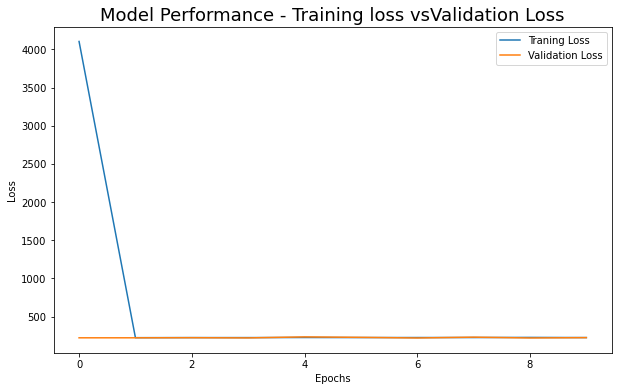

In [33]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],label='Traning Loss')
plt.plot(model_training.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training loss vsValidation Loss',size=18)
plt.legend()
plt.show()

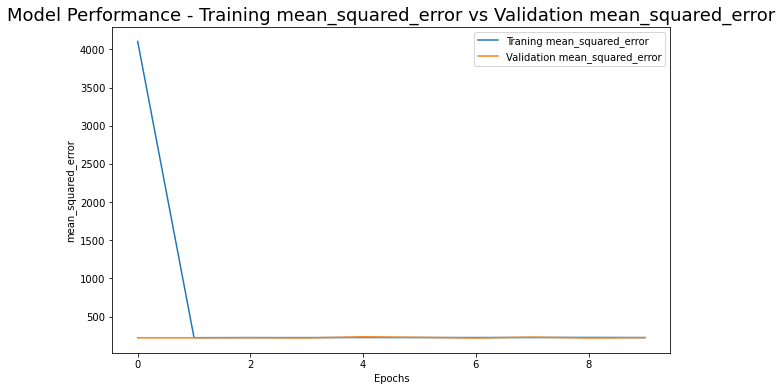

In [34]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['mean_squared_error'],label='Traning mean_squared_error')
plt.plot(model_training.history['val_mean_squared_error'],label='Validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.title('Model Performance - Training mean_squared_error vs Validation mean_squared_error',size=18)
plt.legend()
plt.show()

### 2. Using Dropout Layer

# Model Building

### Build The Architecture

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=15,test_size=0.20)

In [36]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12031, 3), (3008, 3), (12031, 1), (3008, 1))

Since it is a regression problem the activation function here we use is linear activation function that is we dont have to pass any activation function while forming the architecture.

In [37]:
model = Sequential()
model.add(Dense(units=200))
model.add(Dropout(rate=0.20))
model.add(Dense(units=100))
model.add(Dropout(rate=0.20))
model.add(Dense(units=1))

### Model Compiling

In [38]:
model.compile(optimizer='Adam',loss='mean_squared_error',metrics='mean_squared_error')

# Model Training 

In [39]:
model_training = model.fit(x=X_train,y=y_train,batch_size=None,epochs=10,validation_data=(X_test,y_test))
model_training

Epoch 1/10
376/376 [==============================] - 2s 3ms/step - loss: 4259.2524 - mean_squared_error: 4259.2524 - val_loss: 225.0587 - val_mean_squared_error: 225.0587
Epoch 2/10
376/376 [==============================] - 1s 3ms/step - loss: 307.1784 - mean_squared_error: 307.1784 - val_loss: 224.0217 - val_mean_squared_error: 224.0217
Epoch 3/10
376/376 [==============================] - 1s 3ms/step - loss: 304.0193 - mean_squared_error: 304.0193 - val_loss: 227.0546 - val_mean_squared_error: 227.0546
Epoch 4/10
376/376 [==============================] - 1s 3ms/step - loss: 304.0760 - mean_squared_error: 304.0760 - val_loss: 227.6850 - val_mean_squared_error: 227.6850
Epoch 5/10
376/376 [==============================] - 1s 3ms/step - loss: 298.7823 - mean_squared_error: 298.7823 - val_loss: 249.4355 - val_mean_squared_error: 249.4355
Epoch 6/10
376/376 [==============================] - 1s 3ms/step - loss: 298.0718 - mean_squared_error: 298.0718 - val_loss: 220.7610 - val_mean_sq

# Model Prediction

In [40]:
y_pred = model.predict(X_test).flatten()
y_pred

94/94 [==============================] - 0s 2ms/step


array([127.57345, 133.12015, 135.07935, ..., 132.24261, 132.94124,
       145.6688 ], dtype=float32)

# Model Evaluation

In [41]:
model_results = model.evaluate(x=X_test,y=y_test)
print('Model Loss          :',round(model_results[0],4))
print('Mean Squared Error  :',round(model_results[1],4))


94/94 [==============================] - 0s 2ms/step - loss: 223.8587 - mean_squared_error: 223.8587
Model Loss          : 223.8587
Mean Squared Error  : 223.8587


In [42]:
model_comparision = pd.DataFrame({'Actual Output':y_test.values.flatten(),'Predicted Output':y_pred})
model_comparision.head(20)

,Actual Output,Predicted Output
0,108.81,127.573448
1,159.21,133.120148
2,110.79,135.079346
3,109.12,129.631195
4,110.17,128.586929
5,134.70,148.467865
6,133.79,133.369354
7,133.16,129.418549
8,110.83,131.853027
9,148.35,135.427795


# Model Performance

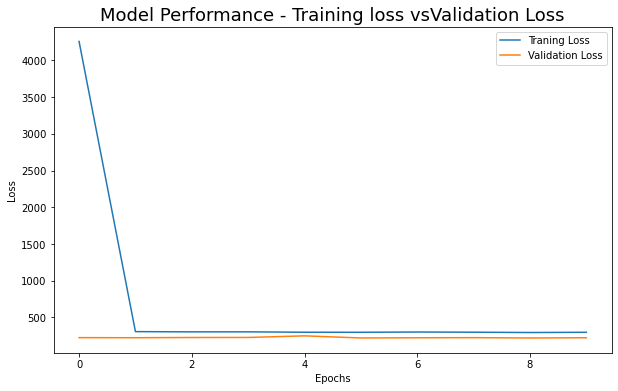

In [43]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],label='Traning Loss')
plt.plot(model_training.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Performance - Training loss vsValidation Loss',size=18)
plt.legend()
plt.show()

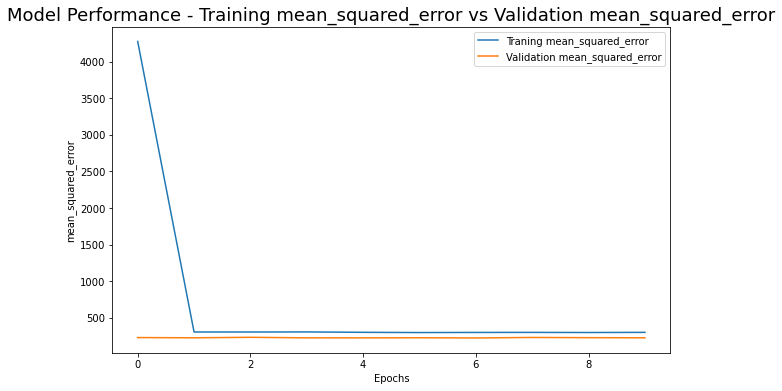

In [40]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['mean_squared_error'],label='Traning mean_squared_error')
plt.plot(model_training.history['val_mean_squared_error'],label='Validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.title('Model Performance - Training mean_squared_error vs Validation mean_squared_error',size=18)
plt.legend()
plt.show()

# ===========================THE END==========================